## 1.Planejamento 

 - Fazer a previsão da quantidade de procedimentos realizados e do faturamento, nos meses que duraram o isolamento social.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importando e tratando a base de dados

 - Importandos os dados do Studio de estética.



In [5]:
url='https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados-studio/studio_biena_guedes_01.csv'

In [6]:
dados = pd.read_csv(url, sep=';', decimal=",")

In [7]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,NaN,30.0,40.0,50.0,10.0,80.0,450.0,100.0,80.0,80.0,250.0,150.0,80.0,250.0,80.0,150.0,0.0,NaN
1,23/12/2018,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,430.0
2,24/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25/12/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26/12/2018,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,640.0


In [2]:
# dados.loc[435:480,:]

 - Excluindo os valores nulos

In [8]:
dados=dados.dropna()

In [1]:
# dados.loc[451:480,:]

 - Convertendo a coluna "data_atendimento" para o formato datetime

In [8]:
# dados['data_atendimento'] = pd.to_datetime(dados['data_atendimento'], errors='coerce')

In [3]:
# dados.loc[451:480,:]

## 3. EDA

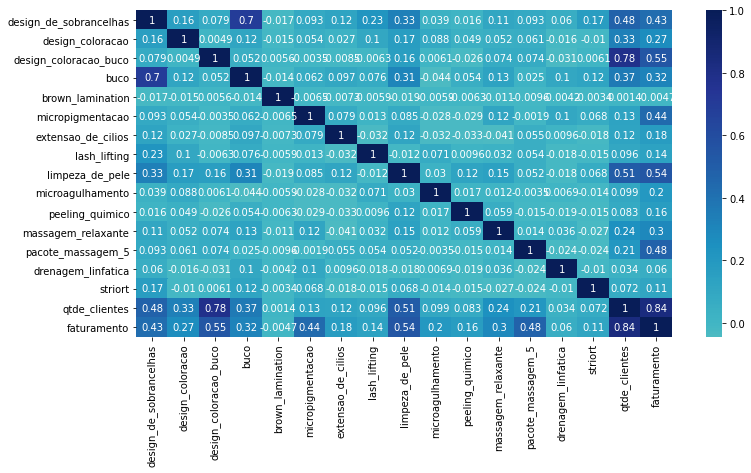

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True, center=0, cmap="YlGnBu")

In [10]:
dados.corr()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
design_de_sobrancelhas,1.000000,0.158269,0.079134,0.697231,-0.017426,0.093136,0.123467,0.226856,0.332340,0.039328,0.015729,0.110830,0.093231,0.060230,0.171040,0.484990,0.427942
design_coloracao,0.158269,1.000000,0.004931,0.116038,-0.014736,0.054388,0.026701,0.102628,0.167688,0.088345,0.048645,0.052100,0.060799,-0.016383,-0.010180,0.332448,0.266413
design_coloracao_buco,0.079134,0.004931,1.000000,0.051742,0.005650,-0.003513,-0.008468,-0.006259,0.157172,0.006064,-0.026352,0.074131,0.073648,-0.031162,0.006076,0.782882,0.545563
buco,0.697231,0.116038,0.051742,1.000000,-0.013763,0.062238,0.097311,0.075554,0.311104,-0.043844,0.053693,0.130947,0.024833,0.102485,0.123251,0.366107,0.315975
brown_lamination,-0.017426,-0.014736,0.005650,-0.013763,1.000000,-0.006453,-0.007348,-0.005948,-0.018998,-0.005897,-0.006251,-0.011091,-0.009579,-0.004210,-0.003376,0.001417,-0.004667
micropigmentacao,0.093136,0.054388,-0.003513,0.062238,-0.006453,1.000000,0.078921,0.013342,0.084960,-0.027705,-0.029366,0.115453,-0.001946,0.101586,0.068114,0.134255,0.444131
extensao_de_cilios,0.123467,0.026701,-0.008468,0.097311,-0.007348,0.078921,1.000000,-0.031822,0.117722,-0.031547,-0.033438,-0.040919,0.055459,0.009645,-0.018062,0.124751,0.178389
lash_lifting,0.226856,0.102628,-0.006259,0.075554,-0.005948,0.013342,-0.031822,1.000000,-0.011827,0.070672,0.009644,0.032392,0.053841,-0.018230,-0.014621,0.096112,0.143533
limpeza_de_pele,0.332340,0.167688,0.157172,0.311104,-0.018998,0.084960,0.117722,-0.011827,1.000000,0.029658,0.121501,0.147586,0.052150,-0.017623,0.067922,0.510410,0.544136
microagulhamento,0.039328,0.088345,0.006064,-0.043844,-0.005897,-0.027705,-0.031547,0.070672,0.029658,1.000000,0.016637,0.011904,-0.003499,0.006880,-0.014495,0.099309,0.198750


 - Agrupando os dados por mês

In [11]:
# dados = dados.set_index('data_atendimento')
# dados_por_mes=dados.resample('M').sum()
# dados_por_mes=dados.resample('M', on='data_atendimento').sum()

In [12]:
# dados.loc[dados['data_atendimento'] =="01/04/2020"]

In [13]:
# erro no arquivo do excel, quandoa coluna data_atendimento e converida para datetime
# algumas datas se desorganizam o que afeta os valores  
# 


 ## 4. Machine learning
 
 
  
   -  Definir X_train e X_test : 
       - X_train são os dados antes da pandemia 
       - X_test são os dados após a pandemia
       - x prede sao os dados durante a pandemia 

 - Definindo as amostras de treino e teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 715 to 511
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        546 non-null    object 
 1   design_de_sobrancelhas  546 non-null    float64
 2   design_coloracao        546 non-null    float64
 3   design_coloracao_buco   546 non-null    float64
 4   buco                    546 non-null    float64
 5   brown_lamination        546 non-null    float64
 6   micropigmentacao        546 non-null    float64
 7   extensao_de_cilios      546 non-null    float64
 8   lash_lifting            546 non-null    float64
 9   limpeza_de_pele         546 non-null    float64
 10  microagulhamento        546 non-null    float64
 11  peeling_quimico         546 non-null    float64
 12  massagem_relaxante      546 non-null    float64
 13  pacote_massagem_5       546 non-null    float64
 14  drenagem_linfatica      546 non-null    

In [17]:
train

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
715,06/12/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,04/04/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,18/12/2020,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100.0
399,25/01/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,27/02/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,31/03/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,10/11/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,09/01/2020,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,550.0
366,23/12/2019,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,60.0


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 231 to 103
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        183 non-null    object 
 1   design_de_sobrancelhas  183 non-null    float64
 2   design_coloracao        183 non-null    float64
 3   design_coloracao_buco   183 non-null    float64
 4   buco                    183 non-null    float64
 5   brown_lamination        183 non-null    float64
 6   micropigmentacao        183 non-null    float64
 7   extensao_de_cilios      183 non-null    float64
 8   lash_lifting            183 non-null    float64
 9   limpeza_de_pele         183 non-null    float64
 10  microagulhamento        183 non-null    float64
 11  peeling_quimico         183 non-null    float64
 12  massagem_relaxante      183 non-null    float64
 13  pacote_massagem_5       183 non-null    float64
 14  drenagem_linfatica      183 non-null    

In [19]:
test

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
231,10/08/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,03/12/2019,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,710.0
333,20/11/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,03/07/2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
725,16/12/2020,3.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,15/11/2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,430.0
530,04/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,24/04/2019,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,130.0
41,01/02/2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0


In [51]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
design_de_sobrancelhas,729.0,0.400549,0.852469,0.0,0.0,0.0,0.0,5.0
design_coloracao,729.0,0.231824,0.583450,0.0,0.0,0.0,0.0,4.0
design_coloracao_buco,729.0,0.703704,1.944985,0.0,0.0,0.0,1.0,19.0
buco,729.0,0.215364,0.580342,0.0,0.0,0.0,0.0,4.0
brown_lamination,729.0,0.001372,0.037037,0.0,0.0,0.0,0.0,1.0
micropigmentacao,729.0,0.031481,0.180924,0.0,0.0,0.0,0.0,2.0
extensao_de_cilios,729.0,0.039781,0.200776,0.0,0.0,0.0,0.0,2.0
lash_lifting,729.0,0.029492,0.183883,0.0,0.0,0.0,0.0,2.0
limpeza_de_pele,729.0,0.407407,0.795333,0.0,0.0,0.0,1.0,5.0
microagulhamento,729.0,0.024691,0.155289,0.0,0.0,0.0,0.0,1.0


- Previsão do faturamento :
 - Média da quantidade de clientes por dia * média do valor gasto por cliente

In [79]:
# soma do faturamento dividido pela quantidade de clientes , retorna o valor médio  gasto por cliente
valor_medio_de_consumo_cliente =dados.faturamento.sum()/dados.qtde_clientes.sum()
valor_medio_de_consumo_cliente

82.70339595375722

In [80]:
# quantidade de clientes dividido pela quantidade de dias , retorna a quantidade média de clientes que frequentam o espaço por dia
media_clientes_por_dia= dados.qtde_clientes.sum()/len(dados.data_atendimento)
media_clientes_por_dia

1.898491083676269

In [78]:
previsao_faturamento_medio=media_clientes_por_dia*valor_medio_de_consumo_cliente
previsao_faturamento_medio

157.0116598079561

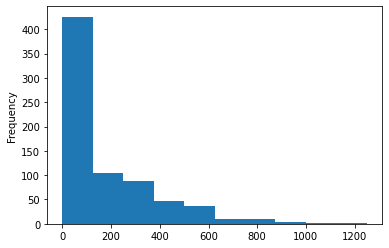

In [66]:

dados.faturamento.plot(kind="hist")

Text(0, 0.5, 'faturamento')

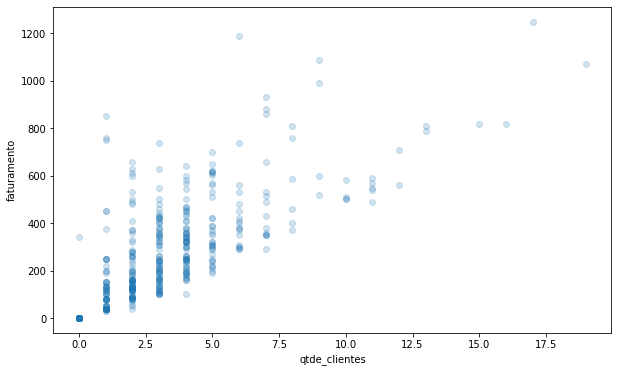

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(dados['qtde_clientes'], dados['faturamento'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('qtde_clientes')
plt.ylabel('faturamento')

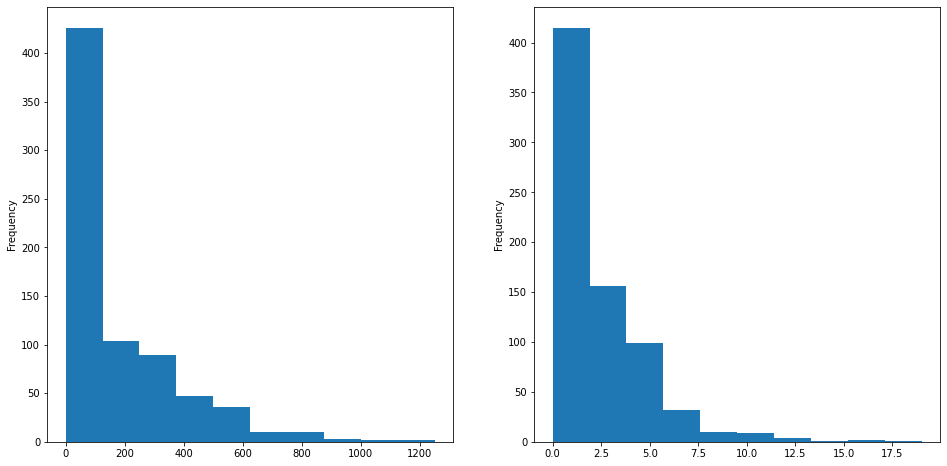

In [87]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
dados.faturamento.plot(kind="hist",ax=ax[0])
dados.qtde_clientes.plot(kind="hist",ax=ax[1])

In [ ]:
### 

 ### Filtrando o DataFrame

 - Normalizando os valores de teste e de treino

In [41]:
train['qtde_clientes']=train['qtde_clientes'].apply(np.log1p)
train['faturamento']=train['faturamento'].apply(np.log1p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
test['qtde_clientes']=test['qtde_clientes'].apply(np.log1p)
test['faturamento']=test['faturamento'].apply(np.log1p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
X_cols = ['design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort','qtde_clientes'
         ]
y_col = ['faturamento']

In [21]:
X_train = train[X_cols]
X_test = test[X_cols]
y_train = train[y_col]
y_test = test[y_col]

In [23]:
X_train.head()

,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes
715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


 - Machine learning

In [43]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
y_pred = neigh.predict(X_test)

In [45]:
# Root Mean Squared Error - RMSE
np.sqrt(np.mean((y_pred-y_test.values)**2))

109.42345803985043

In [46]:
# Mean Squared Error - MSE
np.mean((y_pred-y_test.values)**2)

11973.493169398907

In [47]:
# Mean Absolute Error
np.mean(np.abs(y_pred-y_test.values))

51.91530054644809

In [48]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7436590618637311

## 5. Triagem com outros modelos

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

1.0

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

regressor_list = [DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor()
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_train, y_train)
  train_score = reg.score(X_train, y_train)
  test_score = reg.score(X_test, y_test)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 1.0
Test score 0.7569635781735368
Treinando RandomForestRegressor


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score 0.9889475701048006
Test score 0.8225965381217188
Treinando MLPRegressor


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score 0.7561977303059473
Test score 0.7209113110260064
Treinando XGBRegressor
[20:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9888823057945764
Test score 0.9260914833917969


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(dados, test_size=0.25 , random_state=123)

In [ ]:
train.info()

In [ ]:
test.info()